<a href="https://colab.research.google.com/github/dindin666/CV-Mini-Project/blob/main/Kel3_Mini_Project_CV_Enigma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Jamur Beracun dan Tidak Beracun**

# **Anggota Kelompok 3 (Enigma) :**
1. Andjani Ayu Cahya Tanjung 
2. Dina Amelia Alzahra
3. Hamdan Fauzaan 
4. Mochammad Adjie Setyadji
5. Raihan Fakhri Rabbani 
6. Yuke Salsabila

# **Problem Scoping**

**1. Who?**


*   Siapa saja yang mengalami masalah tersebut?

  Orang awam yang tidak bisa membedakan jamur yang tidak bisa dikonsumsi (beracun) dan jamur yang bisa dikonsumsi (tidak beracun).
*   Siapa saja yang terlibat dalam masalah tersebut?

  Orang yang akan mengkonsumsi jamur.



**2. What?**



*   Apa masalah utamanya?

  Sulitnya membedakan morfologi jamur yang tidak bisa dikonsumsi (beracun) dan jamur yang bisa dikonsumsi (tidak beracun) terutama bagi orang awam.
*   Apa faktor-faktor pendukung masalah tersebut?

  - Waktu yang lebih cepat dan efisien jika dibanding dengan mencari informasi melalui internet atau media lainnya.

**3. Where?**



*   Pada kondisi seperti apa si calon "user" mengalami masalah ini?

  Saat calon "user" akan mengelola jamur untuk dikonsumsi

**4. Why?**



*   Mengapa Masalah ini penting?

  Untuk membantu calon "user" dalam membedakan jamur yang tidak bisa dikonsumsi (beracun) dan jamur yang bisa dikonsumsi (tidak beracun) sehingga diharapkan dapat menurunkan kasus keracunan jamur.
*   Apa nilai utama dari permasalahan ini?

  Memberikan klasifikasi jamur yang tidak bisa dikonsumsi (beracun) dan jamur yang bisa dikonsumsi (tidak beracun).


# **Image Classification**

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d stepandupliak/predict-poison-mushroom-by-photo

 99% 1.43G/1.45G [00:11<00:00, 159MB/s]
100% 1.45G/1.45G [00:11<00:00, 134MB/s]


In [ ]:
!unzip /content/predict-poison-mushroom-by-photo.zip -d '/content/fungi'

Streaming output truncated to the last 5000 lines.
  inflating: /content/fungi/mushroom/edable/edible  (806).png  
  inflating: /content/fungi/mushroom/edable/edible  (807).png  
  inflating: /content/fungi/mushroom/edable/edible  (808).png  
  inflating: /content/fungi/mushroom/edable/edible  (809).png  
  inflating: /content/fungi/mushroom/edable/edible  (81).jpg  
  inflating: /content/fungi/mushroom/edable/edible  (81).png  
  inflating: /content/fungi/mushroom/edable/edible  (810).png  
  inflating: /content/fungi/mushroom/edable/edible  (811).png  
  inflating: /content/fungi/mushroom/edable/edible  (812).png  
  inflating: /content/fungi/mushroom/edable/edible  (813).png  
  inflating: /content/fungi/mushroom/edable/edible  (814).png  
  inflating: /content/fungi/mushroom/edable/edible  (815).png  
  inflating: /content/fungi/mushroom/edable/edible  (816).png  
  inflating: /content/fungi/mushroom/edable/edible  (817).png  
  inflating: /content/fungi/mushroom/edable/edible  (81

In [ ]:
pip install split-folders

In [ ]:
import splitfolders 

splitfolders.ratio('/content/fungi/mushroom', output="/content/fungi/mushroom2", seed=42, ratio=(0.8,0.2), group_prefix=None)

Copying files: 11703 files [00:09, 1240.27 files/s]


In [ ]:
import os

In [ ]:
train_edable_dir = os.path.join('/content/fungi/mushroom2/train/edable')

train_poison_dir = os.path.join('/content/fungi/mushroom2/train/poison')

valid_edable_dir = os.path.join('/content/fungi/mushroom2/val/edable')

valid_poison_dir = os.path.join('/content/fungi/mushroom2/val/poison')

In [ ]:
train_edable_names = os.listdir(train_edable_dir)
print(train_edable_names[:10])

train_poison_names = os.listdir(train_poison_dir)
print(train_poison_names[:10])

validation_edable_hames = os.listdir(valid_edable_dir)
print(validation_edable_hames[:10])

validation_poison_names = os.listdir(valid_poison_dir)
print(validation_poison_names[:10])

['edible  (327).png', '310_7NF2dtHiisQ.jpg', 'JWJ2017-9208058_BybXmuJdKW.jpg', '222_7-3zm2W6yfs.jpg', 'ce (103).jpg', '0699_aQbHX3h8LzQ.jpg', 'edible  (19).jpg', '457_pmzdBtbTnUc.jpg', '636_2Cfw-KKwn8E.jpg', 'ce (208).jpg']
['765_ynTDW-4Qbcc.jpg', 'poison (826).png', 'poison (562).png', '199_TUrct-y9vZ8.jpg', '629_FP1vHbTC3xY.jpg', 'cv (504).jpg', '361_FG01zrZWV7Q.jpg', '931_r1CpeQ2Go2A.jpg', 'cv (70).jpg', 'poison (213).png']
['075_3GSlwdyWD5o.jpg', '0377_BL5s8rjAmTU.jpg', 'BL2015PIC73738675.jpg', '372_U4Fw0b3r5uE.jpg', 'RSS2016-9181020_rkk4HxVel.jpg', '0922_Jk9WJxNFMDw.jpg', 'ce (649).jpg', '112_Q-98asNAtW4.jpg', '016_xFGA2Vyy4Zw.jpg', 'TKEK2017-9217392_ByFq4CIjb.jpg']
['poison (503).png', 'poison (373).png', '470_yfwy3_wN9A4.jpg', 'JM2017-9223778_S1dWmHU2W.jpg', 'TOB2016-9177959_r1E_IZN1e.jpg', 'TOB2017-9208818_rk8Serx5W.jpg', 'MSO2012PIC76707804.jpg', 'EAT2017-9205650_Sy8nkQ3_-.jpg', 'poison (789).png', '756_w-xhasvBIT0.jpg']


In [ ]:
print('total training edable images:', len(os.listdir(train_edable_dir)))
print('total training poison images:', len(os.listdir(train_poison_dir)))
print('total validation edable images:', len(os.listdir(valid_edable_dir)))
print('total validation poison images:', len(os.listdir(valid_poison_dir)))

total training edable images: 5549
total training poison images: 3812
total validation edable images: 1388
total validation poison images: 954


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

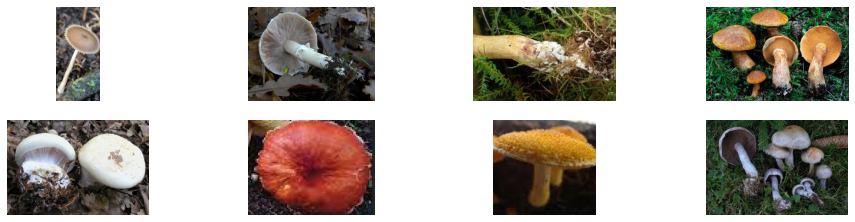

In [ ]:
# Set up matplotlib fig, and size it to fit 4x2 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

pic_index += 4
next_edable_pic = [os.path.join(train_edable_dir, fname) 
                for fname in train_edable_names[pic_index-4:pic_index]]
next_poison_pic = [os.path.join(train_poison_dir, fname) 
                for fname in train_poison_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_edable_pic + next_poison_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/fungi/mushroom2/train',  # This is the source directory for training images
        classes = ['edable', 'poison'],
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/fungi/mushroom2/val',  # This is the source directory for training images
        classes = ['edable', 'poison'],
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 9361 images belonging to 2 classes.
Found 2342 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

# Conv Layer pertama
model.add(Conv2D(16, (5,5), activation = 'relu', input_shape=(224,224, 3)))
model.add(MaxPool2D(2,2))

# Conv Layer kedua
model.add(Conv2D(32, (5,5), activation = 'relu'))
model.add(MaxPool2D(2,2))

# Conv Layer ketiga
model.add(Conv2D(70, (5,5), activation = 'relu'))
model.add(MaxPool2D(2,2))

# Conv Layer keempat
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))

# Conv Layer kelima
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))

# Flatten
model.add(Flatten())
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 70)        56070     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 70)       0

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
    )

# **Training Data**

In [ ]:
history = model.fit(train_generator, 
      steps_per_epoch=8, 
      epochs=20,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[early_stopping])

Epoch 1/20
8/8 [==============================] - 35s 3s/step - loss: 0.8490 - accuracy: 0.5677 - val_loss: 0.4374 - val_accuracy: 1.0000
Epoch 2/20
8/8 [==============================] - 19s 3s/step - loss: 0.6802 - accuracy: 0.5844 - val_loss: 0.5329 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 21s 3s/step - loss: 0.6857 - accuracy: 0.5646 - val_loss: 0.5975 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 20s 3s/step - loss: 0.6829 - accuracy: 0.5719 - val_loss: 0.6829 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 20s 3s/step - loss: 0.6854 - accuracy: 0.6021 - val_loss: 0.4393 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 20s 3s/step - loss: 0.6741 - accuracy: 0.6083 - val_loss: 0.5441 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 20s 3s/step - loss: 0.6773 - accuracy: 0.5917 - val_loss: 0.4846 - val_accuracy: 1.0000
Epoch 8/20
8/8 [==================

In [ ]:
model.evaluate(validation_generator)

20/20 [==============================] - 21s 1s/step - loss: 0.6771 - accuracy: 0.5927


[0.677092432975769, 0.5926558375358582]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

20/20 [==============================] - 22s 1s/step


In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

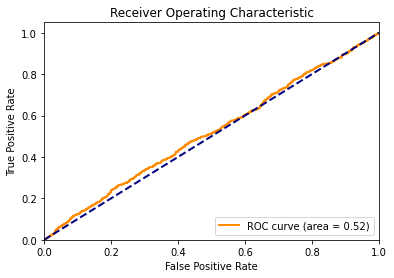

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('model_2.h5')

# **Evaluation**

Saving 0001_yB5GiXfgyRU.jpg to 0001_yB5GiXfgyRU.jpg
0
0001_yB5GiXfgyRU.jpg Jamur ini adalah dapat dimakan


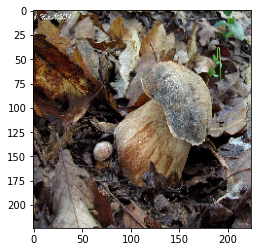

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(x)
  print(np.argmax(classes))
  if classes[0]<0.5:
    print(fn + " Jamur ini adalah dapat dimakan")
  else:
    print(fn + " Jamur ini adalah tidak dapat dimakan")

In [ ]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)